# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import xticks
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
import tensorflow as tf
from sklearn.metrics import f1_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Activation,Dropout
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D,LSTM
from keras.layers import Bidirectional

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Inserting Fake and True datasets (Downloaded from Kaggle)

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# Let's see how the data (both Fake and True datasets) looks like

In [4]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
df_true.head(10)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


# Inserting a column called "class" for fake and real news dataset to categories fake and true news.

In [6]:
df_fake["class"] = 0 #Fake News
df_true["class"] = 1 #True News

# Let's check the shape of the datasets

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

# Removing last 10 rows from both the datasets, for manual testing

In [8]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

# Let's check the shape of the datasets after removing the last 10 rows

In [9]:
df_fake.shape, df_true.shape


((23471, 5), (21407, 5))

# Merging the manual testing dataframe in single dataset and save it in a csv file

In [10]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [11]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing.head(10)


,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

# Merging the fake and true dataframe

In [14]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


# Here, "title", "subject" and "date" columns are not required for detecting the fake news, so I am going to drop the columns.

In [15]:
df = df_marge.drop(["title", "subject","date"], axis = 1)
df.head(10)


,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


# Checking if any null values are present or not

In [16]:
df.isnull().sum()


text     0
class    0
dtype: int64

# Now, Randomly shuffling the dataframe

In [17]:
df = df.sample(frac = 1)

In [18]:
df.head(10)

,text,class
20168,((This Sept. 12 story corrects name of sacked...,1
5719,"On Sunday, Meet the Press host Chuck Todd reve...",0
11750,SYDNEY (Reuters) - A car was deliberately driv...,1
21573,They shot him in the head with a 45. They fo...,0
3852,Let s get something straight here Americans ...,0
2178,TORONTO (Reuters) - Neo-Nazi website the Daily...,1
18518,Judge Napolitano just took the fun out of the ...,0
12062,SANTIAGO (Reuters) - Billionaire former Presid...,1
10796,Former CIA Agent Phil Mudd is a jackwagon! He ...,0
7741,Billionaire Investor Warren Buffett has portra...,0


# Checking if any null values are present or not

In [19]:
df.isnull().sum()


text     0
class    0
dtype: int64

In [20]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [21]:
df.columns

Index(['text', 'class'], dtype='object')

In [22]:
df.head(10)

,text,class
0,((This Sept. 12 story corrects name of sacked...,1
1,"On Sunday, Meet the Press host Chuck Todd reve...",0
2,SYDNEY (Reuters) - A car was deliberately driv...,1
3,They shot him in the head with a 45. They fo...,0
4,Let s get something straight here Americans ...,0
5,TORONTO (Reuters) - Neo-Nazi website the Daily...,1
6,Judge Napolitano just took the fun out of the ...,0
7,SANTIAGO (Reuters) - Billionaire former Presid...,1
8,Former CIA Agent Phil Mudd is a jackwagon! He ...,0
9,Billionaire Investor Warren Buffett has portra...,0


# Creating a function to convert the text in lowercase, remove the extra space, special characters and links.

In [23]:
#lets save stopwords in a variable
stop = list(stopwords.words("english"))

In [24]:
# save list of punctuation/special characters in a variable
punctuation = list(string.punctuation)

In [25]:
# create an object to convert the words to its lemma form
lemma = WordNetLemmatizer()

In [26]:
# lets make a combine list of stopwords and punctuations
sw_pun = stop + punctuation

In [27]:
# function to preprocess the text
def preprocess(text):
    text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text) # removing urls
    text = re.sub('[^\w]',' ',text) # remove embedded special characters in words (for exam
    text = re.sub('[\d]','',text) # this will remove numeric characters
    text = text.lower()
    words = text.split() 
    sentence = ""
    for word in words:
        if word not in (sw_pun): # removing stopwords & punctuations 
            word = lemma.lemmatize(word,pos = 'v') # converting to lemma 
            if len(word) > 2 : # we will consider words with length greater than 2 only
                sentence = sentence + word + ' ' 
    return(sentence)

# Converting the data: text

In [28]:
df["text"] = df["text"].apply(preprocess)


# Lets see the dataframe

In [29]:
df.head(10)

,text,class
0,sept story correct name sack minister paragrap...,1
1,sunday meet press host chuck todd reveal speci...,0
2,sydney reuters car deliberately drive pedestri...,1
3,shoot head find coroner back like hand shoot h...,0
4,let get something straight americans elect don...,0
5,toronto reuters neo nazi website daily stormer...,1
6,judge napolitano take fun democrat party tomor...,0
7,santiago reuters billionaire former president ...,1
8,former cia agent phil mudd jackwagon threaten ...,0
9,billionaire investor warren buffett portray pr...,0


# Distribution of Class Variable

<AxesSubplot:xlabel='class', ylabel='count'>

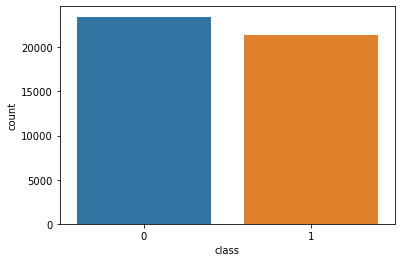

In [30]:
sns.countplot(x=df['class'])


# Defining dependent and independent variable as x and y

In [31]:
x = df["text"]
y = df["class"]

# Splitting the dataset into training set and testing set

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Convert text to vectors (i.e vectorising the text variable)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Proceeding with 4 classification methods:

# 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
LR.score(xv_test, y_test)

0.9848484848484849

In [39]:
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5878
           1       0.98      0.99      0.98      5342

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



# 2. Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [42]:
pred_dt = DT.predict(xv_test)

In [43]:
DT.score(xv_test, y_test)

0.996078431372549

In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      0.99      1.00      5342

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# 3. SVM Classification

In [45]:
from sklearn.svm import SVC


In [46]:
svm =SVC(kernel='linear')
svm.fit(xv_train, y_train)

SVC(kernel='linear')

In [47]:
pred_svm = svm.predict(xv_test)

In [48]:
svm.score(xv_test, y_test)

0.9931372549019608

In [49]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# 4. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
pred_rfc = RFC.predict(xv_test)

In [53]:
RFC.score(xv_test, y_test)

0.9919786096256684

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Comparison

In [55]:
import matplotlib.pyplot as plt
import math

In [56]:
data = {'Model':['Logistic Regression', 'Decission Tree', 'SVM','Random Forest Classifier'],
        'Accuracy':[0.98,1.00, 0.99,0.99]}
  
# Create DataFrame
df = pd.DataFrame(data)

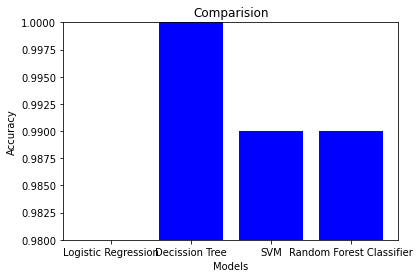

In [69]:
plt.bar("Model", "Accuracy", data = df, color = "blue")
scale_factor=1
low = df['Accuracy'].min()
high = df['Accuracy'].max()
plt.ylim(low * scale_factor, high * scale_factor)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparision")
plt.show()